In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
cancer=datasets.load_breast_cancer()

In [3]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0,test_size=0.2)

In [10]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [13]:
clf.score(x_test,y_test)

0.9385964912280702

In [17]:
x_axis=[]
y_axis=[]

for k in range(1,50,2):
    x_axis.append(k)
    clf=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(clf,x_train,y_train,scoring='accuracy',cv=10)
    y_axis.append(scores.mean())

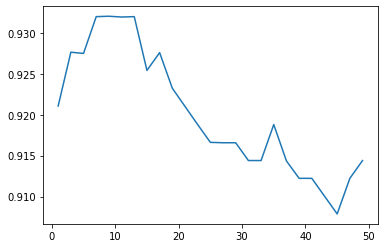

In [21]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.show()

In [26]:
max=-1
max_value=-1
for i in range(len(y_axis)):
    if(y_axis[i]>max_value):
        max_value=y_axis[i]
        max=x_axis[i]
print(max)

9


Self Implimentation

In [34]:
import math
from collections import Counter
def return_y_point(x_test_one,x_train,y_train,k):
    #dictionary={}
    #We cannot sort a dictionary
    dist=[]
    for i in range(len(x_train)):
        distance=math.sqrt(((x_train[i]-x_test_one)**2).sum())
        dist.append([distance,i])
    dist=sorted(dist)
    y_counts=[]
    for i in range(k):
        y_counts.append(y_train[dist[i][1]])
    
    return Counter(y_counts).most_common(1)[0][0]

In [35]:
def fit(x_test):
    y_pred=[]
    k=7
    for i in range(x_test):
        y_pred.append(return_y_point(x_test[i],x_train,y_train,k))
    return y_pred

In [36]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9385964912280702
